In [1]:
import pandas as pd
import numpy as np

# 导入数据

In [2]:
data = pd.read_excel(r'./data/missing_data.xls',header=None)
data

,0,1,2
0,235.8333,324.0343,478.3231
1,236.2708,325.6379,515.4564
2,238.0521,328.0897,517.0909
3,235.9063,NaN,514.8900
4,236.7604,268.8324,NaN
5,NaN,404.0480,486.0912
6,237.4167,391.2652,516.2330
7,238.6563,380.8241,NaN
8,237.6042,388.0230,435.3508
9,238.0313,206.4349,487.6750


# 拉格朗日插值
数据中存在缺失值，我们使用拉格朗日插值方法补充缺失值
拉格朗日多项式插值公式为：
$$L(x)=\sum_{i=0}^{n}l_i(x)y_i$$

In [ ]:
from scipy.interpolate import lagrange


# 模型构建
## 1)数据划分

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = pd.read_excel(r'./data/model.xls')
data

,电量趋势下降指标,线损指标,告警类指标,是否窃漏电
0,4,1,1,1
1,4,0,4,1
2,2,1,1,1
3,9,0,0,0
4,3,1,0,0
...,...,...,...,...
286,4,1,2,0
287,1,0,2,0
288,5,1,2,1
289,2,1,0,0


In [4]:
# 数据洗牌
x_data,y_data = shuffle(data.iloc[:,:-1],data.iloc[:,-1])

#构建训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=42)

In [5]:
# 构建CART决策树模型
from sklearn.tree import DecisionTreeClassifier

treefile = '../temp/tree.pkl' #模型输出地址
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
# 定义一个函数，用于可视化混淆矩阵
def cm_plot(y, yp):
  
  from sklearn.metrics import confusion_matrix #导入混淆矩阵函数

  cm = confusion_matrix(y, yp) #混淆矩阵
  
  import matplotlib.pyplot as plt #导入作图库
  plt.matshow(cm, cmap=plt.cm.Greens) #画混淆矩阵图，配色风格使用cm.Greens，更多风格请参考官网。
  plt.colorbar() #颜色标签
  
  for x in range(len(cm)): #数据标签
    for y in range(len(cm)):
      plt.annotate(cm[x,y], xy=(x, y), horizontalalignment='center', verticalalignment='center')
  
  plt.ylabel('True label') #坐标轴标签
  plt.xlabel('Predicted label') #坐标轴标签
  return plt


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


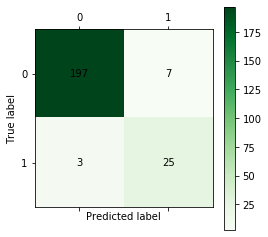

In [7]:
cm_plot(y_train,tree.predict(X_train)).show()

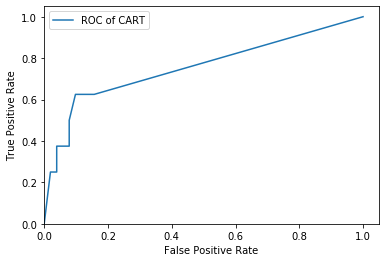

In [10]:
# 绘制决策树模型ROC曲线
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1], pos_label=1)
plt.plot(fpr,tpr,linewidth=1.5,label='ROC of CART')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1.05)
plt.ylim(0,1.05)
plt.legend(loc=2)
plt.show()

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.